In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("pd_speech_features.csv")
df.head()
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

Hãy sử dụng các bước và công cụ phù hợp để thực hiện được các công việc sau:
a) Giảm số chiều xuống còn 200 ứng với thành phần chính của dữ liệu bằng PCA nhằm phục vụ cho
việc phân loại dữ liệu (theo class), với phần dữ liệu Train gồm 500 bản ghi và dữ liệu kiểm tra là phần
còn lại. Dùng các công cụ đo độ chính xác để kiểm tra đánh giá mô hình.

In [53]:
#split train and test
train = df[:500]
test = df[500:]

# train
X_train = train.drop(["class"], axis=1)
y_train = train["class"]

#test
X_test = test.drop([ "class" ],axis=1)
y_test = test["class"]


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.78515625


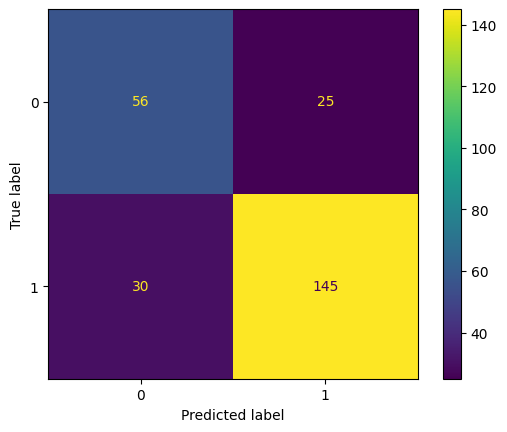

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
ConfusionMatrixDisplay(confusion_mat).plot()



Hãy sử dụng phương phap PCA để đưa dữ liệu về số chiều nhỏ nhất sao cho lượng thông tin được
giữ lại ít nhất đạt 80%.
i. Cho biết dữ liệu mới còn bao nhiêu chiều.
ii. Thực hiện lại bài toán phân loại với tỷ lệ như trên, ứng với dữ liệu mới và so sánh độ chính
xác.

Number of dimension: 54
Accuracy: 0.74609375


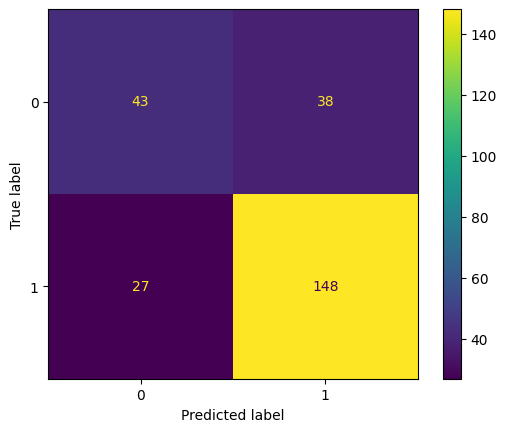

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

pca = PCA(n_components=0.8)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Number of dimension:", pca.n_components_)
print("Accuracy:", accuracy)
ConfusionMatrixDisplay(confusion_mat).plot()



Sử dụng dữ liệu ban đầu, chia thành các tập Train- Test với tỷ lệ 4:2, sau đó áp dụng phương pháp
Naïve Bayes phù hợp và phương pháp Hồi quy Logistic để thực hiện bài toán phân loại (theo class).

In [57]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train_before, X_test_before, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=24)

Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_before, y_train)

y_pred_nb_before = nb_classifier.predict(X_test_before)
# Calculate accuracy and confusion matrix
accuracy_nb_before = accuracy_score(y_test, y_pred_nb_before)
print("accuracy", accuracy_nb_before)

accuracy 0.8092105263157895


Logistic Regression

In [59]:
logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train_before, y_train)

y_pred_logistic_before = logistic_classifier.predict(X_test_before)
# Calculate accuracy and confusion matrix
accuracy_lr_before = accuracy_score(y_test, y_pred_logistic_before)
print("accuracy", accuracy_lr_before)

accuracy 0.8486842105263158


Tiếp theo lại thực nghiệm các mô hình nói trên với dữ liệu đã giảm chiều ở ý b), cùng tỷ lệ chia như
trên. Hãy đánh giá xem 2 mô hình này, mô hình nào có độ chính xác thay đổi nhiều hơn.

In [60]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.8)
pca.fit(X_scaled)
X_pca =  pca.transform(X_scaled)

# Split the data into train and test sets
X_train_after, X_test_after, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=24)

Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_after, y_train)

y_pred_nb_after = nb_classifier.predict(X_test_after)
# Calculate accuracy and confusion matrix
accuracy_nb_after = accuracy_score(y_test, y_pred_nb_after)
print("accuracy", accuracy_nb_after)

accuracy 0.7631578947368421


Logistic Regression

In [70]:
logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train_after, y_train)

y_pred_logistic_after = logistic_classifier.predict(X_test_after)
# Calculate accuracy and confusion matrix
accuracy_lr_after = accuracy_score(y_test, y_pred_logistic_after)
print("accuracy", accuracy_lr_after)

accuracy 0.868421052631579


Naive Bayes độ chính xác bị thay đổi nhiều từ 0.8 xuống 0.74
Logistic Regression tăng từ 0.84 lên 0.86 do giảm các trường bị thừa